In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [2]:
# for some sets of input parameters, SVM will be slow to converge.  We will terminate early.
# This code will suppress warnings.
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

#  Training and Testing Scatterplots

In [3]:
# load training set
ytrain = []
Xtrain = []
with open('HW3train.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
#         print(row)
        if len(row)==3:
            ytrain.append( int(row[0]) )
            Xtrain.append( [float(row[1]) , float(row[2]) ])

Xtrain = np.array(Xtrain)
ytrain = np.array(ytrain)
            
#Verify values loaded correctly
# print(ytrain)
# print(Xtrain)

Text(0, 0.5, 'Feature 2')

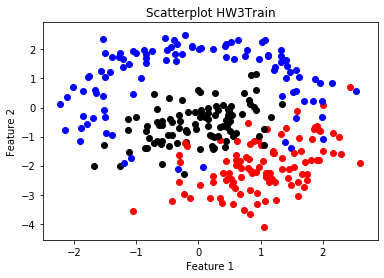

In [4]:
for x,y in zip(Xtrain, ytrain):
#     print(x1,x2,y)
    if y==1:
        col = 'blue'
    if y==2:
        col = 'red'
    if y==3:
        col = 'black'
    plt.scatter(x[0], x[1],  color=col)
    
plt.title('Scatterplot HW3Train')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.savefig('HW3trainscatter.png',dpi=300,bbox_inches='tight')

In [5]:
# load testing set
ytest = []
Xtest = []
with open('HW3test.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',',lineterminator='\n')
    for row in reader:
#         print(row)
        if len(row)==3:
            ytest.append( int(row[0]) )
            Xtest.append( [float(row[1]) , float(row[2]) ])
            
Xtest = np.array(Xtest)
ytest = np.array(ytest)
            
#Verify values loaded correctly
# print(ytest)
# print(Xtest)

Text(0, 0.5, 'Feature 2')

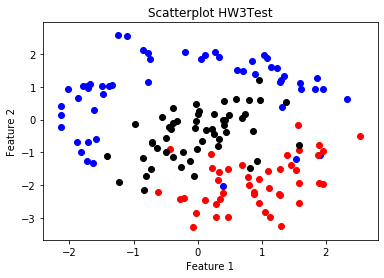

In [6]:
for x,y in zip(Xtest, ytest):
#     print(x1,x2,y)
    if y==1:
        col = 'blue'
    if y==2:
        col = 'red'
    if y==3:
        col = 'black'
    plt.scatter(x[0], x[1],  color=col)
    
plt.title('Scatterplot HW3Test')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.savefig('HW3trainscatter.png',dpi=300,bbox_inches='tight')

# Create a Mesh (to help plot classification functions)

To visualize the region for each class $$y\in\{+1,+2,+3\}$$ we will use a meshgrid

If you find it runs slow, increase the mesh step size $h$ to $h=0.5$

In [7]:
h = .03  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh 
x1_min, x1_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
x2_min, x2_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
x1mesh, x2mesh = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

In [8]:
# Create color maps
cmap_light = ListedColormap(['lightblue', 'lightcoral', 'grey'])
cmap_bold = ListedColormap(['blue', 'red', 'black'])

# Example with kNN for $k=3$ and $k=20$

Working on k=3
	The training accuracy is 0.93
	The testing accuracy is 0.85
Working on k=20
	The training accuracy is 0.92
	The testing accuracy is 0.91


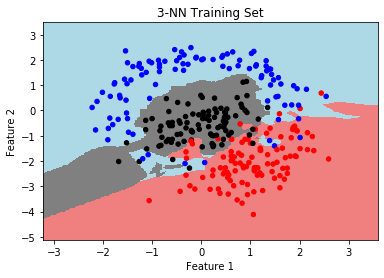

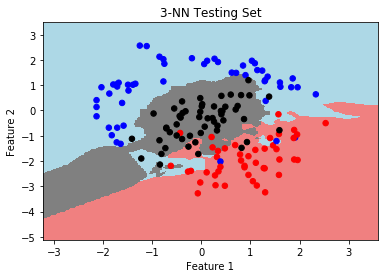

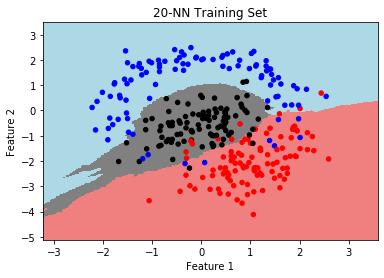

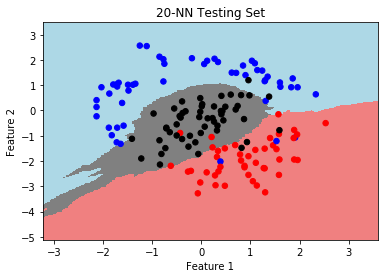

In [9]:
for n_neighbors in [3,20]:
    # we create an instance of Neighbours Classifier and fit the data.
    
    clf = KNeighborsClassifier(n_neighbors, weights='uniform',algorithm='auto')
    clf.fit(Xtrain, ytrain)

    Z = clf.predict(np.c_[x1mesh.ravel(), x2mesh.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x1mesh.shape)

    # Plot the training points with the mesh
    plt.figure()
    plt.pcolormesh(x1mesh, x2mesh, Z, cmap=cmap_light)
    ytrain_colors = [y-1 for y in ytrain]
    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=ytrain_colors, cmap=cmap_bold, s=20)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('%i-NN Training Set' % (n_neighbors))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Plot the testing points with the mesh
    ypred = clf.predict(Xtest)
    plt.figure()
    plt.pcolormesh(x1mesh, x2mesh, Z, cmap=cmap_light)
    ytest_colors = [y-1 for y in ytest]
    plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest_colors, cmap=cmap_bold, s=30)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('%i-NN Testing Set' % (n_neighbors))
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    #Report training and testing accuracies
    print('Working on k=%i'%(n_neighbors))
    trainacc =  clf.score(Xtrain,ytrain) 
    testacc = clf.score(Xtest,ytest) 
    print('\tThe training accuracy is %.2f'%(trainacc))
    print('\tThe testing accuracy is %.2f'%(testacc))